<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Financial_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Kospi 자료 수집 및 분석

In [1]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.0 MB/s eta 0:00:00


In [2]:
!pip install --upgrade yfinance

In [3]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [4]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2025-10-15'

In [5]:
# 주가 데이터를 불러옴
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

# Get the data
data1 = yf.download('^KS11', start_date, end_date)

/tmp/ipython-input-847437481.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('^KS11', start_date, end_date)
[*********************100%***********************]  1 of 1 completed


In [6]:
# Print 5 rows
data1.tail()

Price,Close,High,Low,Open,Volume
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11
Date,,,,,
2025-10-01,3455.830078,3459.739990,3440.419922,3444.060059,493600
2025-10-02,3549.209961,3565.959961,3512.159912,3525.479980,402100
2025-10-10,3610.600098,3617.860107,3569.439941,3598.110107,407400
2025-10-13,3584.550049,3584.550049,3522.540039,3550.080078,408000
2025-10-14,3561.810059,0.000000,0.000000,0.000000,0


In [7]:
data2 = fdr.DataReader('ks11', '2000')  #investing.com에서 코드를 확인하고 입력
data2.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2025-10-01,3444.06,3459.74,3440.42,3455.83,493641155,0.0091,1,31.23,12344643388616,2.845544e+15
2025-10-02,3525.48,3565.96,3512.16,3549.21,402107231,0.0270,1,93.38,19456116765360,2.922226e+15
2025-10-10,3598.11,3617.86,3569.44,3610.60,407410846,0.0173,1,61.39,19600845152565,2.974646e+15
2025-10-13,3550.08,3584.55,3522.54,3584.55,408033131,-0.0072,2,-26.05,14270855613049,2.952829e+15
2025-10-14,3604.12,3646.77,3535.52,3561.81,734084905,-0.0063,2,-22.74,18926398057017,2.933878e+15


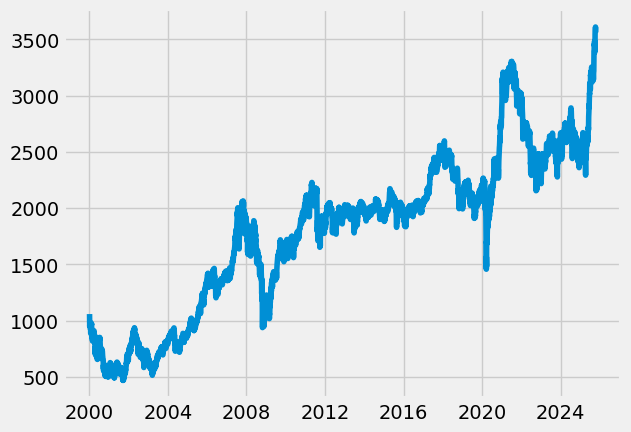

In [8]:
datag1=data1[['Close']]
plt.plot(datag1)

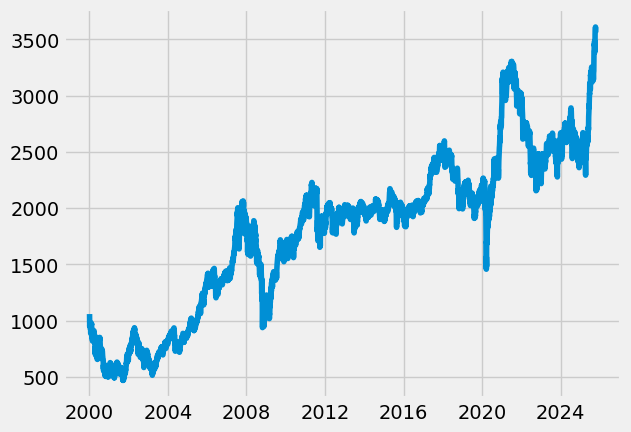

In [9]:
datag2=data2[['Close']]
plt.plot(datag2)

In [10]:
Kospi=data1

In [11]:
Kospi['Return']=np.log(Kospi['Close']/Kospi['Close'].shift(1))

In [12]:
Kospi.tail()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2025-10-01,3455.830078,3459.739990,3440.419922,3444.060059,493600,0.009078
2025-10-02,3549.209961,3565.959961,3512.159912,3525.479980,402100,0.026662
2025-10-10,3610.600098,3617.860107,3569.439941,3598.110107,407400,0.017149
2025-10-13,3584.550049,3584.550049,3522.540039,3550.080078,408000,-0.007241
2025-10-14,3561.810059,0.000000,0.000000,0.000000,0,-0.006364


In [13]:
Kospi.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2000-01-04,1059.040039,1066.180054,1016.590027,1028.329956,195900,NaN
2000-01-05,986.309998,1026.520020,984.049988,1006.869995,257700,-0.071147
2000-01-06,960.789978,1014.900024,953.500000,1013.950012,203500,-0.026215
2000-01-07,948.650024,970.159973,930.840027,949.169983,215700,-0.012716
2000-01-10,987.239990,994.940002,974.820007,979.669983,240200,0.039873


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

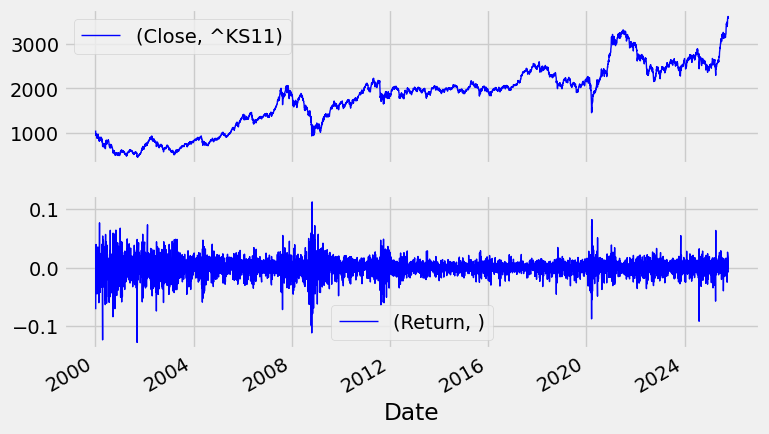

In [14]:
Kospi[['Close','Return']].plot(subplots=True, style='b', lw='1', figsize=(8,5))

In [15]:
Kospi['40d']=Kospi['Close'].rolling(window=40).mean()
Kospi['240d']=Kospi['Close'].rolling(window=240).mean()

In [16]:
Kospi[['Close', '40d', '240d']].tail()

Price,Close,40d,240d
Ticker,^KS11,,
Date,,,
2025-10-01,3455.830078,3285.571515,2761.586211
2025-10-02,3549.209961,3294.348267,2765.554128
2025-10-10,3610.600098,3303.921271,2769.667920
2025-10-13,3584.550049,3313.284772,2773.630837
2025-10-14,3561.810059,3322.160773,2777.595212


<Axes: xlabel='Date'>

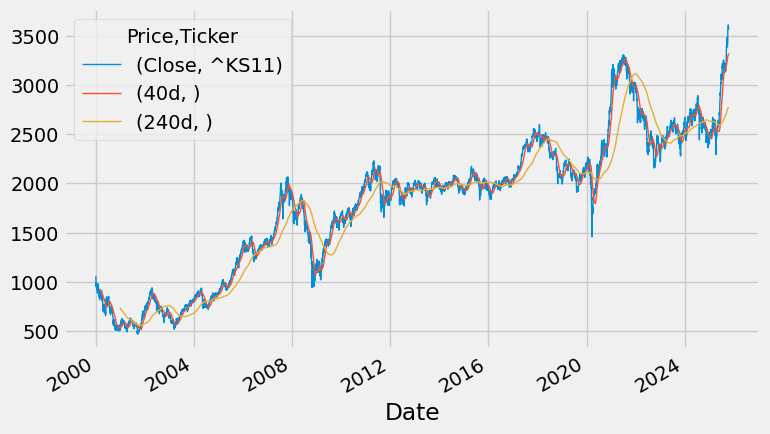

In [17]:
Kospi[['Close', '40d', '240d']].plot(lw='1', figsize=(8,5))

In [18]:
Kospi['Mov_vol']=Kospi['Return'].rolling(window=245).std()*math.sqrt(245)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

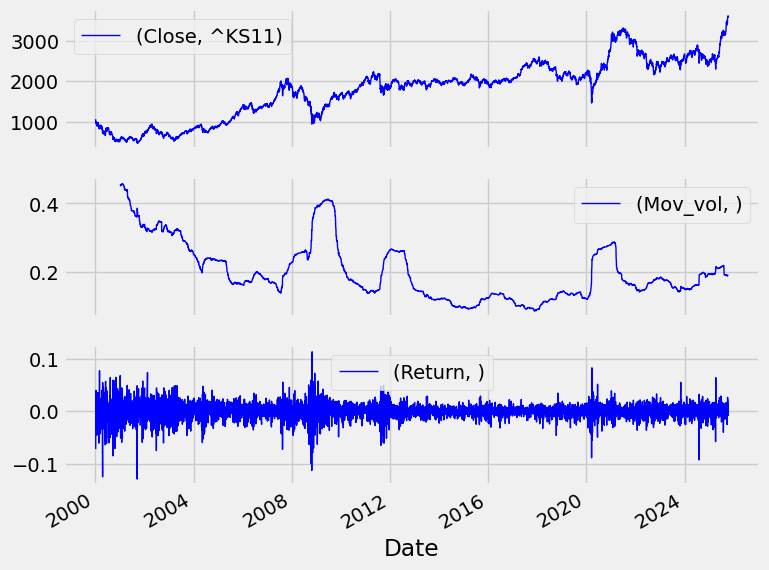

In [19]:
Kospi[['Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

#### 주요 주가지수 분석

In [20]:
kospi = yf.download('^KS11', start_date, end_date)
snp = yf.download('^GSPC',start_date, end_date) #S&P500
nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100

/tmp/ipython-input-3965347332.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  kospi = yf.download('^KS11', start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3965347332.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  snp = yf.download('^GSPC',start_date, end_date) #S&P500
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3965347332.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3965347332.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100
[*********************100%***********************]  1 of 1 completed


In [21]:
snp.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [22]:
# 지수 자료를 병합
eqt1 = pd.merge(snp['Close'], kospi['Close'],left_index=True, right_index=True, how='inner')
eqt1.columns=['SP500','KOSPI']

eqt2 = pd.merge(nikkei['Close'], euronext['Close'],left_index=True, right_index=True, how='inner')
eqt2.columns=['Nikkei','Euronext']

eqt3 = pd.merge(eqt1, eqt2,left_index=True, right_index=True, how='inner')

In [23]:
eqt3.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [24]:
rtn= ( np.log(eqt3) - np.log(eqt3.shift(1)) )*100
rtn.columns=['r_sp','r_kp','r_nk','r_ux']
rtn.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


In [25]:
eqt = pd.merge(eqt3,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,SP500,KOSPI,Nikkei,Euronext,r_sp,r_kp,r_nk,r_ux
Date,,,,,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,18542.550781,930.260010,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,1403.449951,960.789978,18168.269531,922.460022,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,1441.469971,948.650024,18193.410156,943.880005,2.672995,-1.271589,0.138281,2.295501
2000-01-11,1438.560059,981.330017,18850.919922,954.059998,-0.202075,3.386886,3.550227,1.072752


In [26]:
pr = eqt[['SP500', 'KOSPI', 'Nikkei','Euronext']]
pr.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [27]:
rt = eqt[['r_sp','r_kp','r_nk','r_ux']]
rt.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


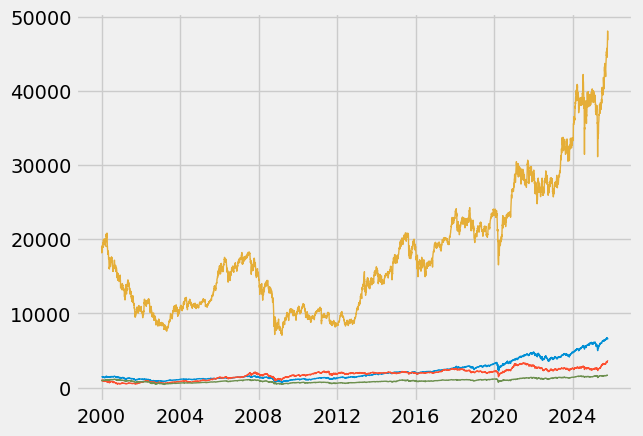

In [28]:
# 원 자료로 그림을 그려 봄
plt.plot(pr, lw='1')

In [29]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가(relative stock price)를 표현
pr_0 = pr / pr.iloc[0] - 1.0

<Axes: xlabel='Date'>

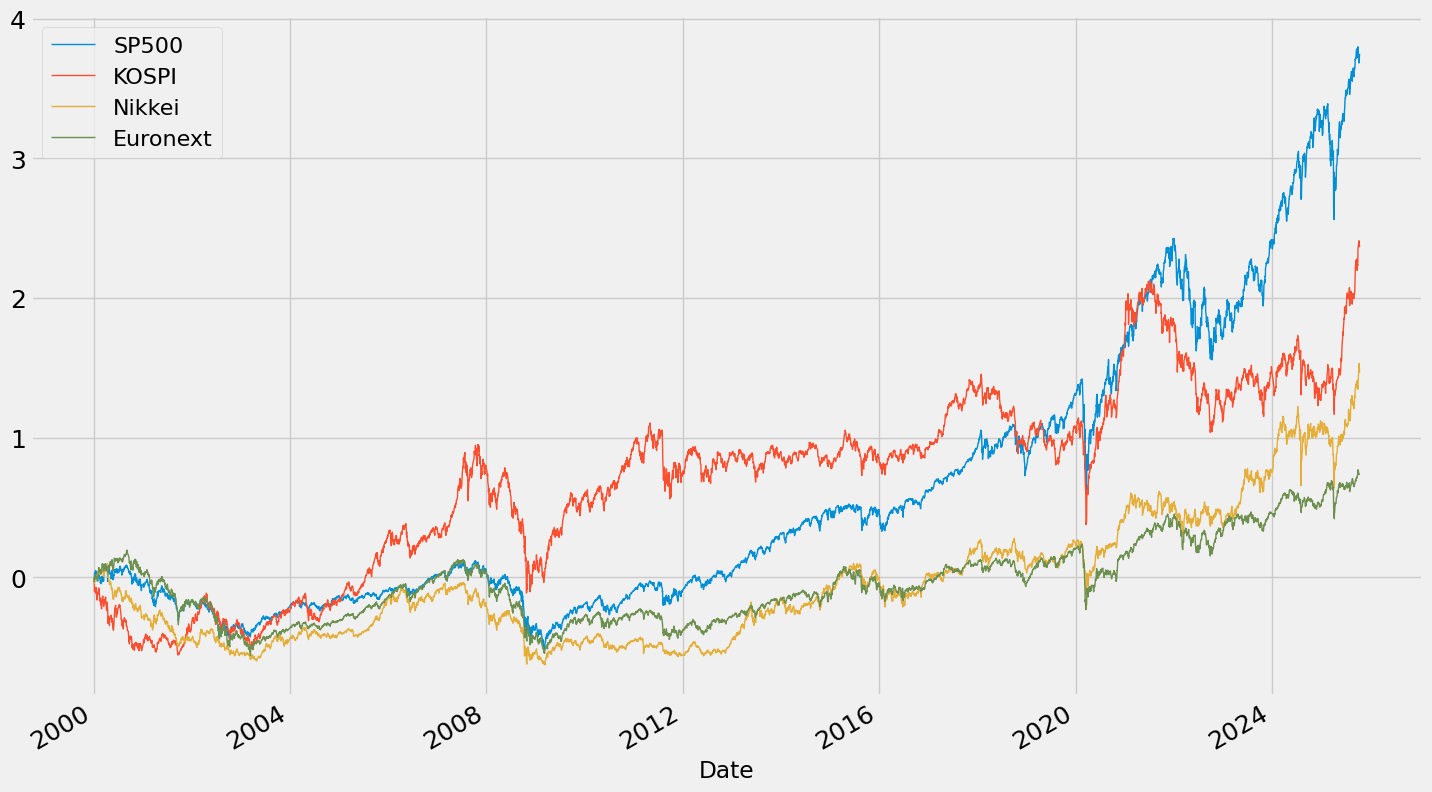

In [30]:
# 상대가격을 그래프로 표현
plt.rcParams['legend.fontsize'] = 16
pr_0.plot( figsize=(16,10), fontsize=18, lw='1')

<Axes: xlabel='Date'>

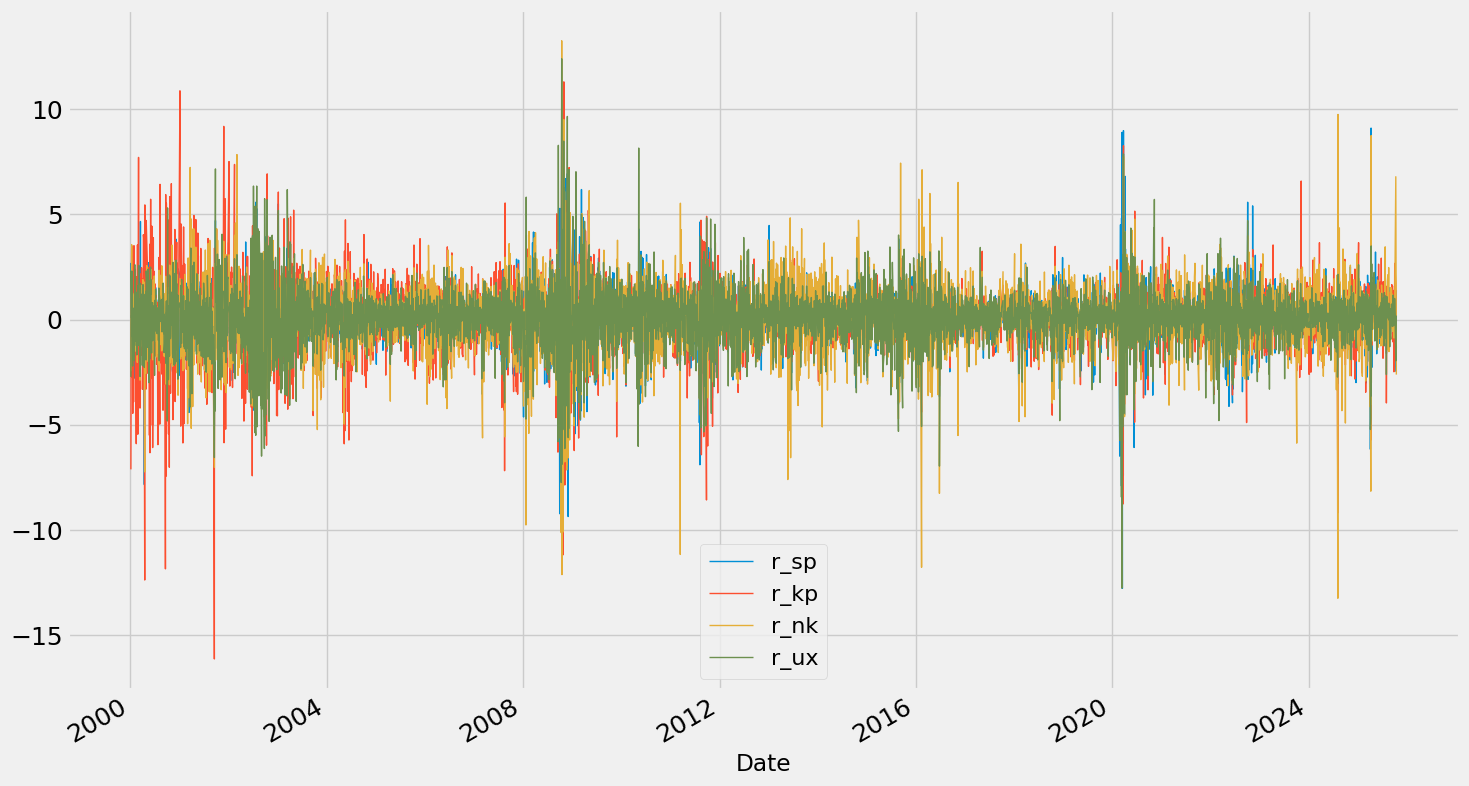

In [31]:
#  수익률 그래프도 표현
plt.rcParams['legend.fontsize'] = 16
rt.plot( figsize=(16,10), lw='1', fontsize=18)

In [32]:
pr.describe()

,SP500,KOSPI,Nikkei,Euronext
count,5782.000000,5782.000000,5782.000000,5782.000000
mean,2221.829149,1792.042764,17919.796671,915.404761
std,1393.040486,700.877315,8443.830632,272.399476
min,676.530029,468.760010,7054.979980,419.950012
25%,1207.109985,1267.570038,10879.094971,692.142517
50%,1512.794983,1943.794983,16035.754883,879.809998
75%,2850.332397,2267.114929,22191.824219,1060.015015
max,6715.350098,3610.600098,48088.800781,1691.229980


In [33]:
rt.describe()

,r_sp,r_kp,r_nk,r_ux
count,5781.000000,5781.000000,5781.000000,5781.000000
mean,0.026945,0.020981,0.015608,0.009561
std,1.283024,1.521884,1.539479,1.340262
min,-12.765220,-16.115370,-13.234076,-12.751740
25%,-0.488449,-0.629666,-0.730981,-0.593475
50%,0.072546,0.073617,0.054568,0.061991
75%,0.612430,0.763502,0.836561,0.657869
max,10.423562,11.284352,13.234592,12.378520


In [34]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

              r_sp         r_kp         r_nk         r_ux
count  5781.000000  5781.000000  5781.000000  5781.000000
mean      0.026945     0.020981     0.015608     0.009561
std       1.283024     1.521884     1.539479     1.340262
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.488449    -0.629666    -0.730981    -0.593475
50%       0.072546     0.073617     0.054568     0.061991
75%       0.612430     0.763502     0.836561     0.657869
max      10.423562    11.284352    13.234592    12.378520
skeness:  r_sp   -0.405651
r_kp   -0.601031
r_nk   -0.458885
r_ux   -0.154698
dtype: float64
kurtosis:  r_sp    10.065369
r_kp     9.051227
r_nk     7.382507
r_ux     7.444592
dtype: float64


In [35]:
# 우리가 원하는 통계량이 모두 포함된 기초통계표를 만들음
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              SP500          KOSPI        Nikkei      Euronext
count  5.782000e+03    5782.000000  5.782000e+03   5782.000000
mean   2.221829e+03    1792.042764  1.791980e+04    915.404761
std    1.393040e+03     700.877315  8.443831e+03    272.399476
min    6.765300e+02     468.760010  7.054980e+03    419.950012
25%    1.207110e+03    1267.570038  1.087909e+04    692.142517
50%    1.512795e+03    1943.794983  1.603575e+04    879.809998
75%    2.850332e+03    2267.114929  2.219182e+04   1060.015015
max    6.715350e+03    3610.600098  4.808880e+04   1691.229980
var    1.940562e+06  491229.011049  7.129828e+07  74201.474265
skew   1.275399e+00      -0.169431  1.059549e+00      0.628559
kurt   6.633519e-01      -0.729052  4.670489e-01     -0.260947


In [36]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_nk         r_ux
count  5781.000000  5781.000000  5781.000000  5781.000000
mean      0.026945     0.020981     0.015608     0.009561
std       1.283024     1.521884     1.539479     1.340262
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.488449    -0.629666    -0.730981    -0.593475
50%       0.072546     0.073617     0.054568     0.061991
75%       0.612430     0.763502     0.836561     0.657869
max      10.423562    11.284352    13.234592    12.378520
var       1.646152     2.316131     2.369996     1.796303
skew     -0.405651    -0.601031    -0.458885    -0.154698
kurt     10.065369     9.051227     7.382507     7.444592


In [37]:
pr.corr()

,SP500,KOSPI,Nikkei,Euronext
SP500,1.000000,0.791156,0.968007,0.915152
KOSPI,0.791156,1.000000,0.734617,0.683422
Nikkei,0.968007,0.734617,1.000000,0.960112
Euronext,0.915152,0.683422,0.960112,1.000000


In [38]:
rt.corr()

,r_sp,r_kp,r_nk,r_ux
r_sp,1.000000,0.227843,0.196306,0.593807
r_kp,0.227843,1.000000,0.609255,0.376863
r_nk,0.196306,0.609255,1.000000,0.398591
r_ux,0.593807,0.376863,0.398591,1.000000


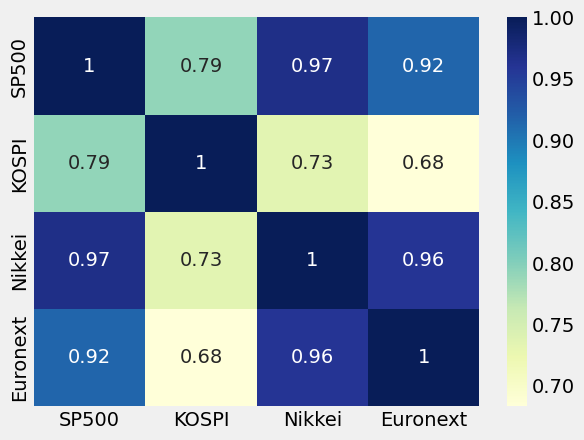

In [39]:
sns.heatmap(pr.corr(), annot=True, cmap="YlGnBu")
plt.show()

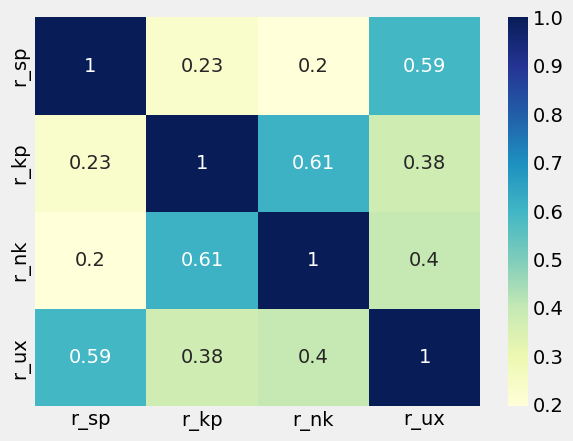

In [40]:
sns.heatmap(rt.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### 회귀 분석

In [41]:
snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
vix = yf.download('^vix',start_date, end_date) #VIX 지수

/tmp/ipython-input-3458128986.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3458128986.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download('^vix',start_date, end_date) #VIX 지수
[*********************100%***********************]  1 of 1 completed


In [42]:
data = pd.merge(snp['Close'], vix['Close'],left_index=True, right_index=True, how='inner')
data.columns=['SP500','VIX']

In [43]:
data.tail()

,SP500,VIX
Date,,
2025-10-08,6753.720215,16.299999
2025-10-09,6735.109863,16.430000
2025-10-10,6552.509766,21.660000
2025-10-13,6654.720215,19.030001
2025-10-14,6644.310059,20.809999


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

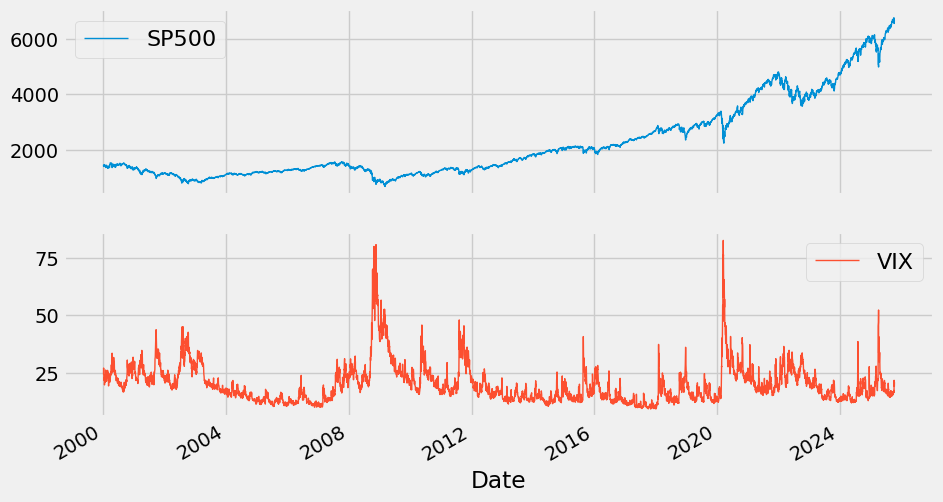

In [44]:
data.plot(subplots=True, figsize=(10, 6), lw='1')

<Axes: xlabel='Date'>

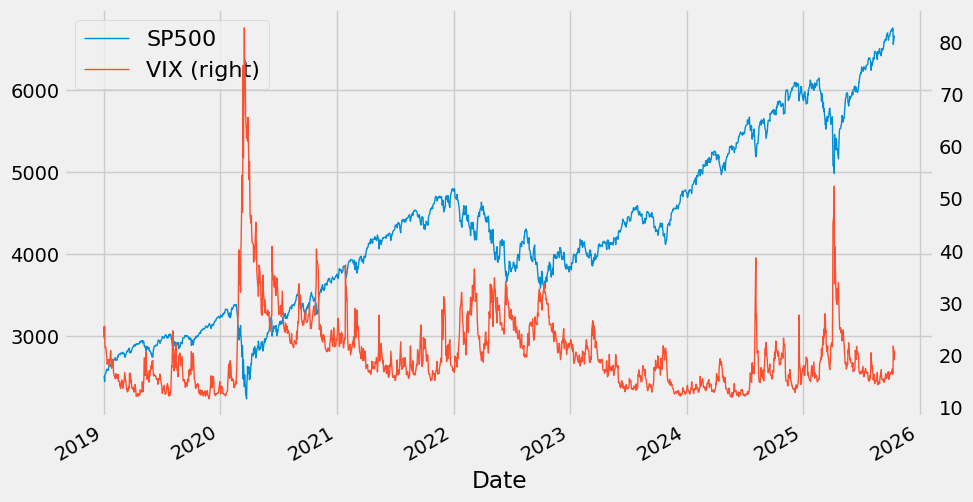

In [45]:
data.loc['2018-12-31':].plot(secondary_y='VIX', figsize=(10, 6), lw='1')

In [46]:
rets = np.log(data / data.shift(1))

In [47]:
rets.head()

,SP500,VIX
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424


In [48]:
rets.dropna(inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

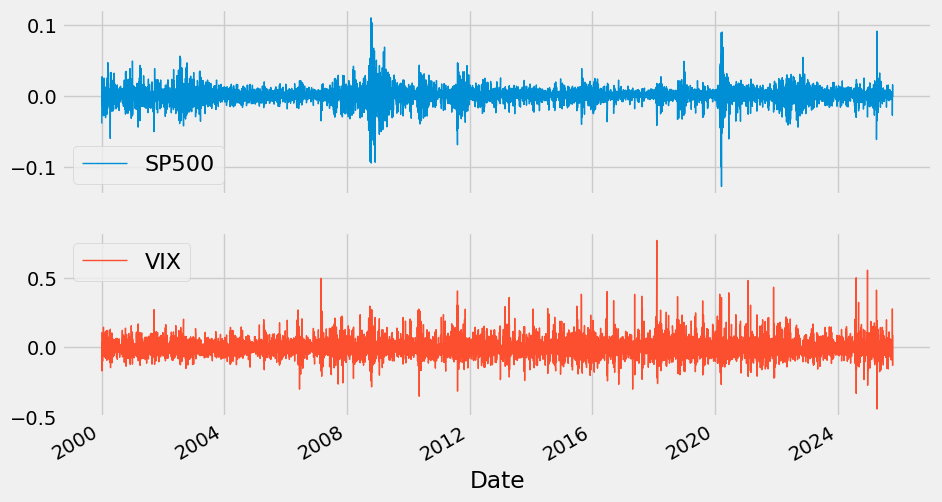

In [49]:
rets.plot(subplots=True, figsize=(10, 6), lw='1')

array([[<Axes: xlabel='SP500', ylabel='SP500'>,
        <Axes: xlabel='VIX', ylabel='SP500'>],
       [<Axes: xlabel='SP500', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

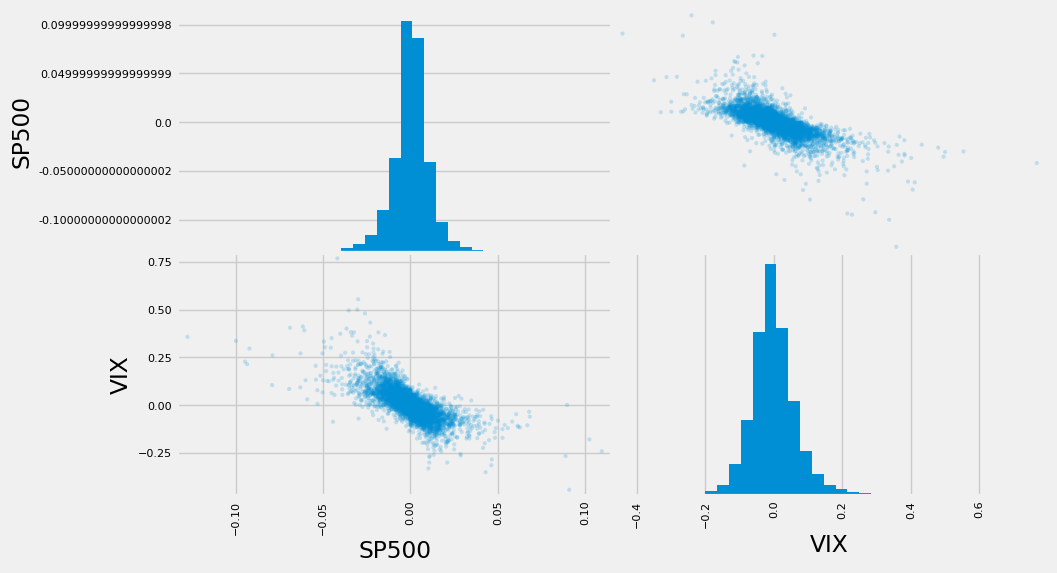

In [50]:
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6))

In [51]:
reg = np.polyfit(rets['SP500'], rets['VIX'], deg=1)

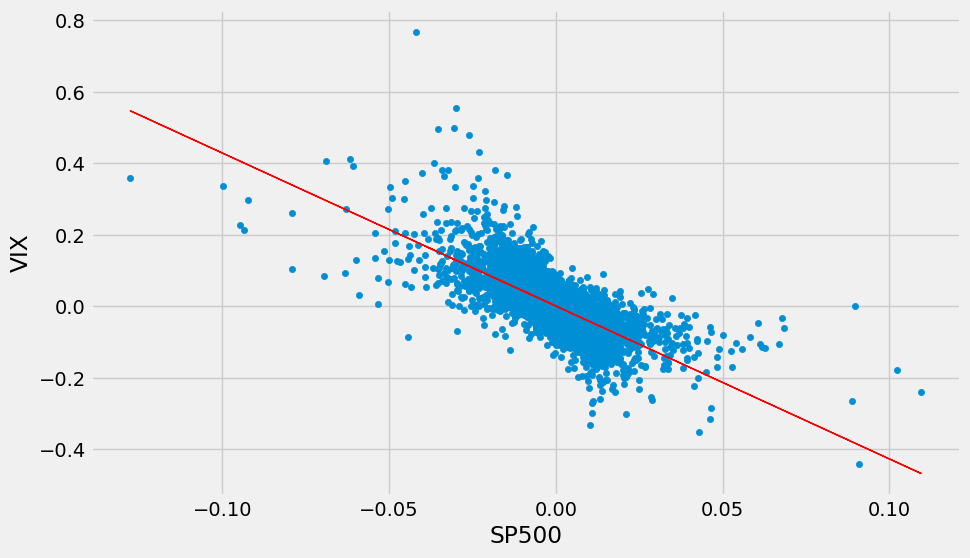

In [52]:
ax = rets.plot(kind='scatter', x='SP500', y='VIX', figsize=(10, 6))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw='1')

In [53]:
rets.corr()

,SP500,VIX
SP500,1.000000,-0.732156
VIX,-0.732156,1.000000


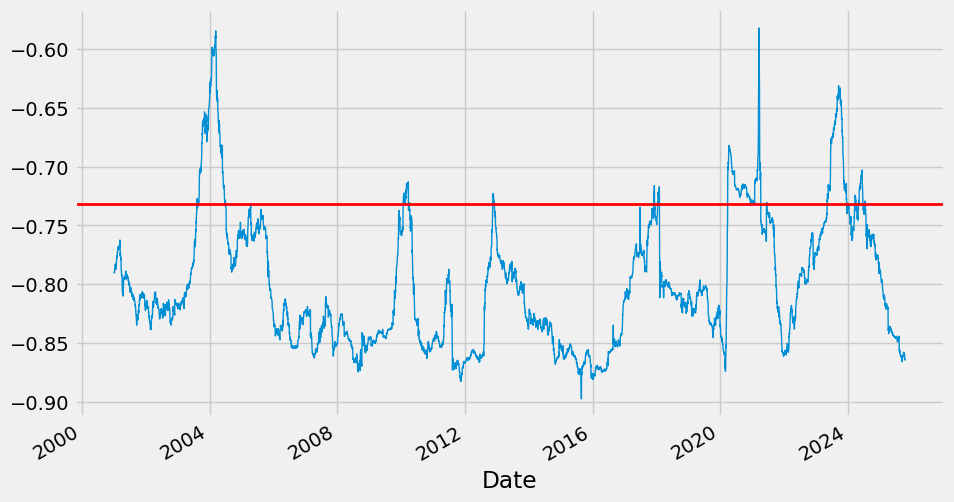

In [54]:
ax = rets['SP500'].rolling(window=252).corr(
                  rets['VIX']).plot(figsize=(10, 6), lw='1')
ax.axhline(rets.corr().iloc[0, 1], c='r', lw='2')